Latar Belakang

Kesehatan mental merupakan aspek penting dalam kesejahteraan individu, namun sering kali sulit untuk mengidentifikasi siapa yang memerlukan intervensi medis. Faktor-faktor seperti usia, tingkat stres, kualitas tidur, aktivitas fisik, serta kepatuhan terhadap pengobatan dapat memengaruhi kondisi kesehatan mental seseorang. Keterlambatan dalam mendeteksi gangguan kesehatan mental dapat menyebabkan perawatan yang tidak tepat atau kurang efektif.

Target Treatment Progress (1-10) merupakan variabel yang mengukur sejauh mana seseorang mengalami kemajuan dalam perawatan mentalnya. Skala ini digunakan untuk menilai efektivitas pengobatan yang diberikan, dengan nilai yang lebih rendah (1-4) menunjukkan sedikit atau tidak ada kemajuan, nilai sedang (5-7) menunjukkan adanya perbaikan yang belum optimal, dan nilai tinggi (8-10) menandakan bahwa perawatan sangat efektif dan pasien mengalami peningkatan yang signifikan. Dalam konteks model machine learning, "Treatment Progress (1-10)" berperan sebagai variabel target (Y) dalam regresi, di mana model akan memprediksi nilai ini berdasarkan berbagai faktor seperti tingkat keparahan gejala, kualitas tidur, aktivitas fisik, serta kepatuhan terhadap perawatan. Dengan prediksi ini, tenaga medis dapat mengevaluasi efektivitas terapi yang diberikan dan menyesuaikan pendekatan pengobatan jika diperlukan, sehingga pasien mendapatkan perawatan yang lebih optimal.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#untuk mengabaikan warning
warnings.filterwarnings("ignore")

print("Semua Library diatas termuat")

Semua Library diatas termuat


In [3]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [35]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


In [5]:
#pengecekan Missing Value
df.isna().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
df[df.duplicated()]

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)


In [7]:
df_baru = df.copy()
df_baru = df_baru[[
    "Age",
    "Symptom Severity (1-10)",
    "Mood Score (1-10)",
    "Sleep Quality (1-10)",
    "Physical Activity (hrs/week)",
    "Adherence to Treatment (%)",
    "Stress Level (1-10)",
    "Gender",
    "Diagnosis",
    "Medication",
    "Therapy Type",
    "AI-Detected Emotional State",
    "Treatment Progress (1-10)"
    
]]

df_baru

,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Adherence to Treatment (%),Stress Level (1-10),Gender,Diagnosis,Medication,Therapy Type,AI-Detected Emotional State,Treatment Progress (1-10)
0,43,10,5,8,5,66,9,Female,Major Depressive Disorder,Mood Stabilizers,Interpersonal Therapy,Anxious,7
1,40,9,5,4,7,78,7,Female,Major Depressive Disorder,Antipsychotics,Interpersonal Therapy,Neutral,7
2,55,6,3,4,3,62,7,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Happy,5
3,34,6,3,6,5,72,8,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Excited,10
4,52,7,6,6,8,63,5,Male,Panic Disorder,Anxiolytics,Interpersonal Therapy,Excited,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,10,4,8,6,73,9,Male,Generalized Anxiety,Mood Stabilizers,Dialectical Behavioral Therapy,Depressed,10
496,22,5,6,6,7,86,6,Male,Panic Disorder,Benzodiazepines,Mindfulness-Based Therapy,Happy,8
497,23,7,3,4,2,87,5,Male,Major Depressive Disorder,Antidepressants,Cognitive Behavioral Therapy,Neutral,5
498,48,9,4,6,9,73,6,Male,Bipolar Disorder,Antidepressants,Mindfulness-Based Therapy,Anxious,7


In [8]:
from sklearn.preprocessing import LabelEncoder

df_baru['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df_baru['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])
df_baru['Medication'] = LabelEncoder().fit_transform(df['Medication'])
df_baru['Therapy Type'] = LabelEncoder().fit_transform(df['Therapy Type'])
df_baru['AI-Detected Emotional State'] = LabelEncoder().fit_transform(df['AI-Detected Emotional State'])
df_baru['Outcome'] = LabelEncoder().fit_transform(df['Outcome'])


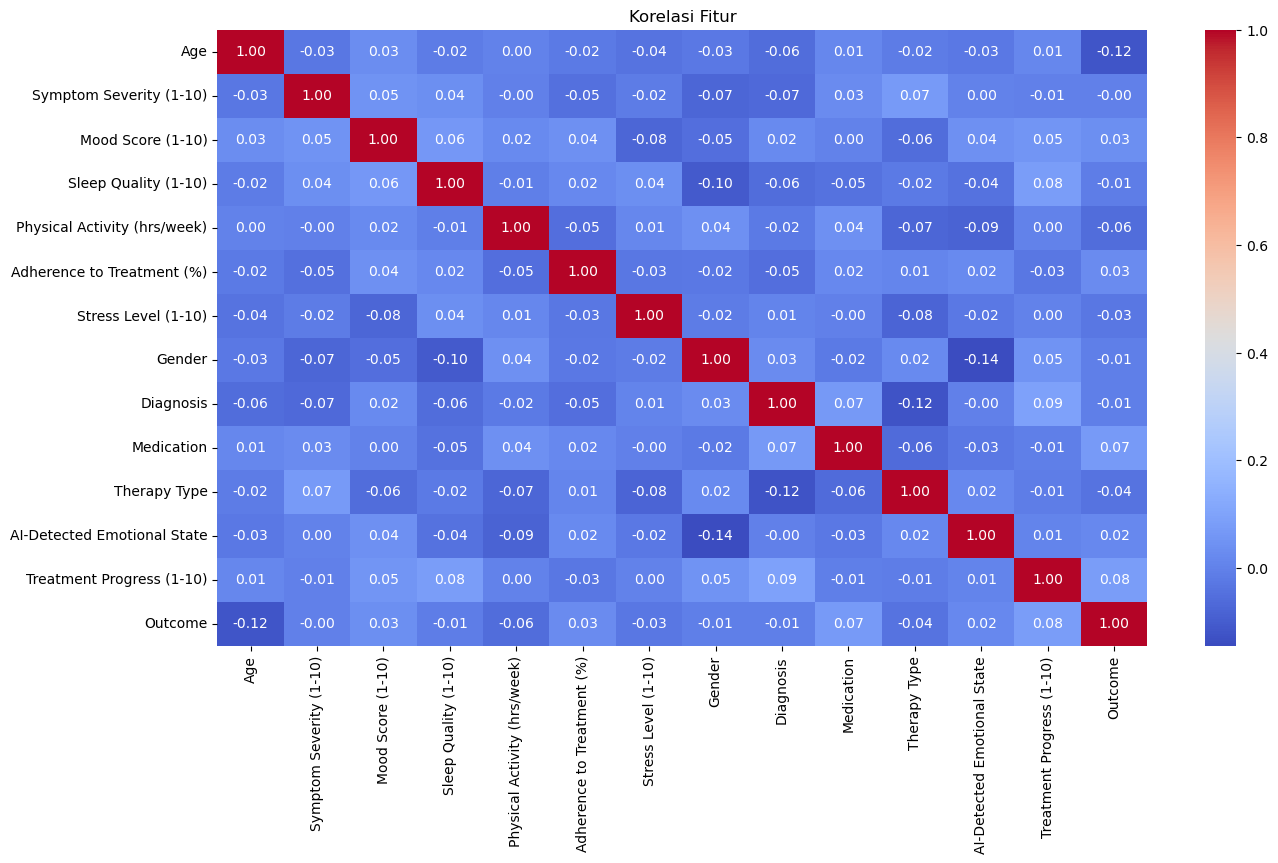

In [9]:
#seleksi Fitur

#menghitung korelasi
korelasi_fitur = df_baru.corr()

#membuat heatmap
plt.figure(figsize = (15,8))
sns.heatmap(korelasi_fitur, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Fitur")
plt.show()

Penelitian sebelumnya menunjukkan bahwa faktor seperti usia, status sosial, tingkat keparahan depresi, riwayat trauma, insomnia, dan kepatuhan terhadap terapi memengaruhi efektivitas pengobatan. Dataset mental health dapat menggunakan fitur ini untuk memprediksi treatment progress, termasuk variabel seperti tingkat keparahan gejala, kualitas tidur, aktivitas fisik, dan jenis terapi. Dengan menggabungkan fitur klinis dan psikososial, model machine learning dapat memberikan prediksi yang lebih akurat untuk menyesuaikan perawatan dengan kebutuhan individu pasien (Kemp, 2015).

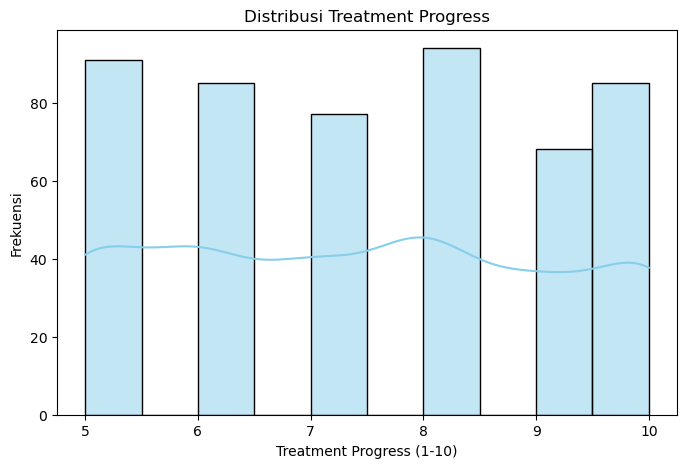

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df_baru['Treatment Progress (1-10)'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Treatment Progress")
plt.xlabel("Treatment Progress (1-10)")
plt.ylabel("Frekuensi")
plt.show()

Histogram ini menunjukkan bahwa sebagian besar pasien memiliki kemajuan pengobatan yang cukup baik (di atas 7).

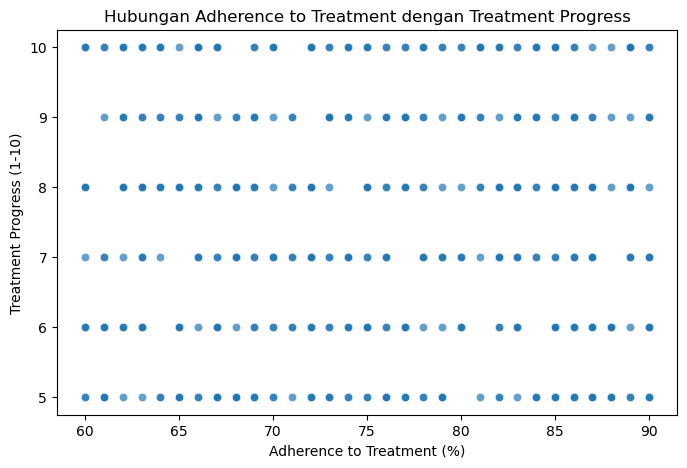

In [57]:
# Scatter plot hubungan Adherence to Treatment dengan Treatment Progress
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Adherence to Treatment (%)'], y=df['Treatment Progress (1-10)'], alpha=0.7)
plt.title("Hubungan Adherence to Treatment dengan Treatment Progress")
plt.xlabel("Adherence to Treatment (%)")
plt.ylabel("Treatment Progress (1-10)")
plt.show()


Plot ini menunjukkan bahwa semakin tinggi kepatuhan pasien terhadap pengobatan, kemungkinan besar kemajuan pengobatan mereka juga lebih tinggi.

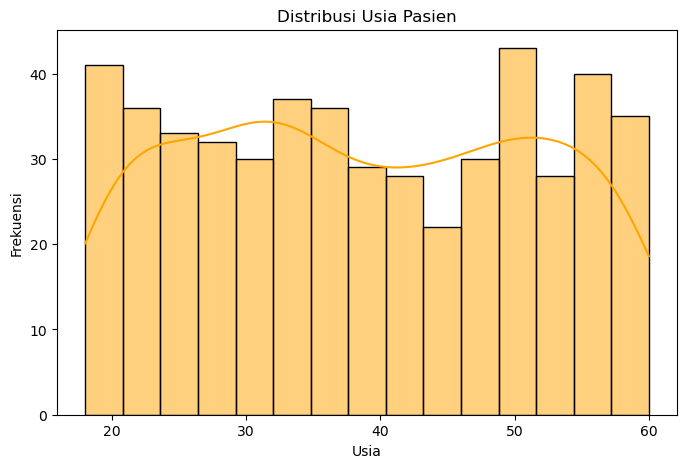

In [53]:
# Distribusi usia pasien
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True, color='orange')
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

Sebaran usia pasien cukup merata di berbagai rentang usia, tanpa ada kelompok usia yang benar-benar mendominasi.
Kelompok usia muda (20) dan usia 50-an memiliki frekuensi yang relatif tinggi, menunjukkan bahwa pasien dalam rentang usia ini lebih umum dalam data.

In [10]:
df_baru

,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Adherence to Treatment (%),Stress Level (1-10),Gender,Diagnosis,Medication,Therapy Type,AI-Detected Emotional State,Treatment Progress (1-10),Outcome
0,43,10,5,8,5,66,9,0,2,4,2,0,7,0
1,40,9,5,4,7,78,7,0,2,1,2,4,7,2
2,55,6,3,4,3,62,7,0,2,5,3,3,5,0
3,34,6,3,6,5,72,8,0,2,5,3,2,10,0
4,52,7,6,6,8,63,5,1,3,2,2,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,10,4,8,6,73,9,1,1,4,1,1,10,1
496,22,5,6,6,7,86,6,1,3,3,3,3,8,0
497,23,7,3,4,2,87,5,1,2,0,0,4,5,0
498,48,9,4,6,9,73,6,1,0,0,3,0,7,1


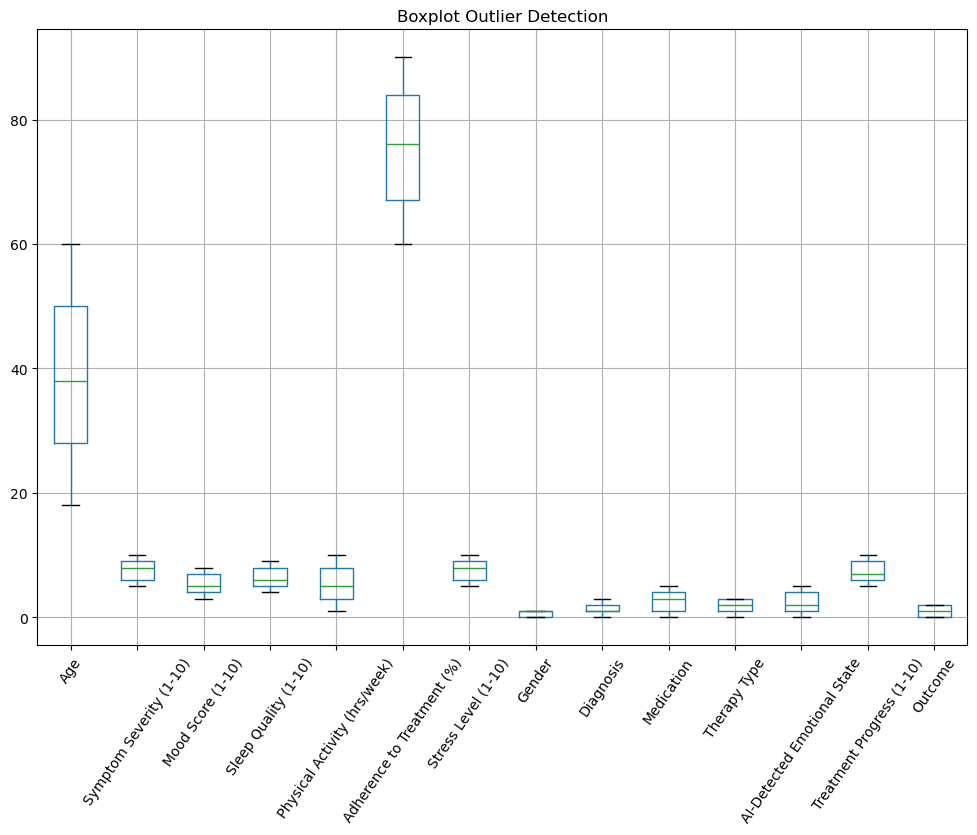

In [11]:
#mengecek outlier
#membuat boxplot outlier
plt.figure(figsize=(12,8))
df_baru.boxplot()
plt.title("Boxplot Outlier Detection")
plt.xticks(rotation=55)
plt.show()

In [12]:
# Melatih model
from sklearn.model_selection import train_test_split

#memasukkan linear regression
from sklearn.linear_model import LinearRegression
#import GBR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#metrics evaluasi
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
#membagi X dan Y
X = df_baru.drop(columns=["Treatment Progress (1-10)"])
y = df_baru["Treatment Progress (1-10)"]

In [14]:
model_mlr = LinearRegression()
model_gbr = GradientBoostingRegressor(random_state=42)
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [15]:
ration_test = [0.2, 0.3, 0.4]

In [16]:

# Model yang akan diuji
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Rasio data uji yang akan diuji
ratio_test = [0.2, 0.3, 0.4]

# Looping untuk setiap rasio
for ratio in ratio_test:
    print(f"\n=== Evaluasi dengan Test Size = {ratio} ===")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    # Looping untuk setiap model
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Prediksi
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Evaluasi
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Print hasil evaluasi
        print(f"\nModel: {name}")
        print(f"R² Score Pelatihan : {r2_train:.4f}")
        print(f"R² Score Pengujian  : {r2_test:.4f}")
        print(f"MSE Pelatihan       : {mse_train:.4f}")
        print(f"MSE Pengujian       : {mse_test:.4f}")
        print(f"RMSE Pelatihan      : {rmse_train:.4f}")



=== Evaluasi dengan Test Size = 0.2 ===

Model: Linear Regression
R² Score Pelatihan : 0.0264
R² Score Pengujian  : 0.0294
MSE Pelatihan       : 2.9087
MSE Pengujian       : 2.8080
RMSE Pelatihan      : 1.7055

Model: Gradient Boosting Regressor
R² Score Pelatihan : 0.6225
R² Score Pengujian  : -0.2089
MSE Pelatihan       : 1.1279
MSE Pengujian       : 3.4975
RMSE Pelatihan      : 1.0620

Model: Random Forest Regressor
R² Score Pelatihan : 0.8588
R² Score Pengujian  : -0.1027
MSE Pelatihan       : 0.4218
MSE Pengujian       : 3.1903
RMSE Pelatihan      : 0.6494

=== Evaluasi dengan Test Size = 0.3 ===

Model: Linear Regression
R² Score Pelatihan : 0.0218
R² Score Pengujian  : 0.0209
MSE Pelatihan       : 2.9434
MSE Pengujian       : 2.8104
RMSE Pelatihan      : 1.7156

Model: Gradient Boosting Regressor
R² Score Pelatihan : 0.6365
R² Score Pengujian  : -0.2015
MSE Pelatihan       : 1.0937
MSE Pengujian       : 3.4489
RMSE Pelatihan      : 1.0458

Model: Random Forest Regressor
R² Scor

Pilih Model RF regression 60:40 karena:

Tidak menghasilkan R² negatif pada data uji.

Error (MSE/RMSE) lebih rendah.

"Treatment Progress (1-10)" adalah indikator penting dalam menilai efektivitas perawatan mental seseorang. Dengan menggunakan model regresi, nilai ini dapat diprediksi berdasarkan faktor-faktor seperti tingkat keparahan gejala, kualitas tidur, aktivitas fisik, dan kepatuhan terhadap pengobatan. Prediksi ini memungkinkan tenaga medis untuk mengevaluasi dan menyesuaikan metode perawatan agar lebih optimal. Dengan demikian, penggunaan pendekatan berbasis data dalam analisis kesehatan mental dapat membantu meningkatkan hasil pengobatan dan kesejahteraan pasien.

Daftar Referensi

Kemp, A. H., Brunoni, A. R., & Machado-Vieira, R. (2015). Predictors of treatment response in major depressive disorder. Treatment-Resistant Mood Disorders, 53-60.

